<a href="https://colab.research.google.com/github/rubangits35/Machine_Vision/blob/main/Machine_VisionExp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

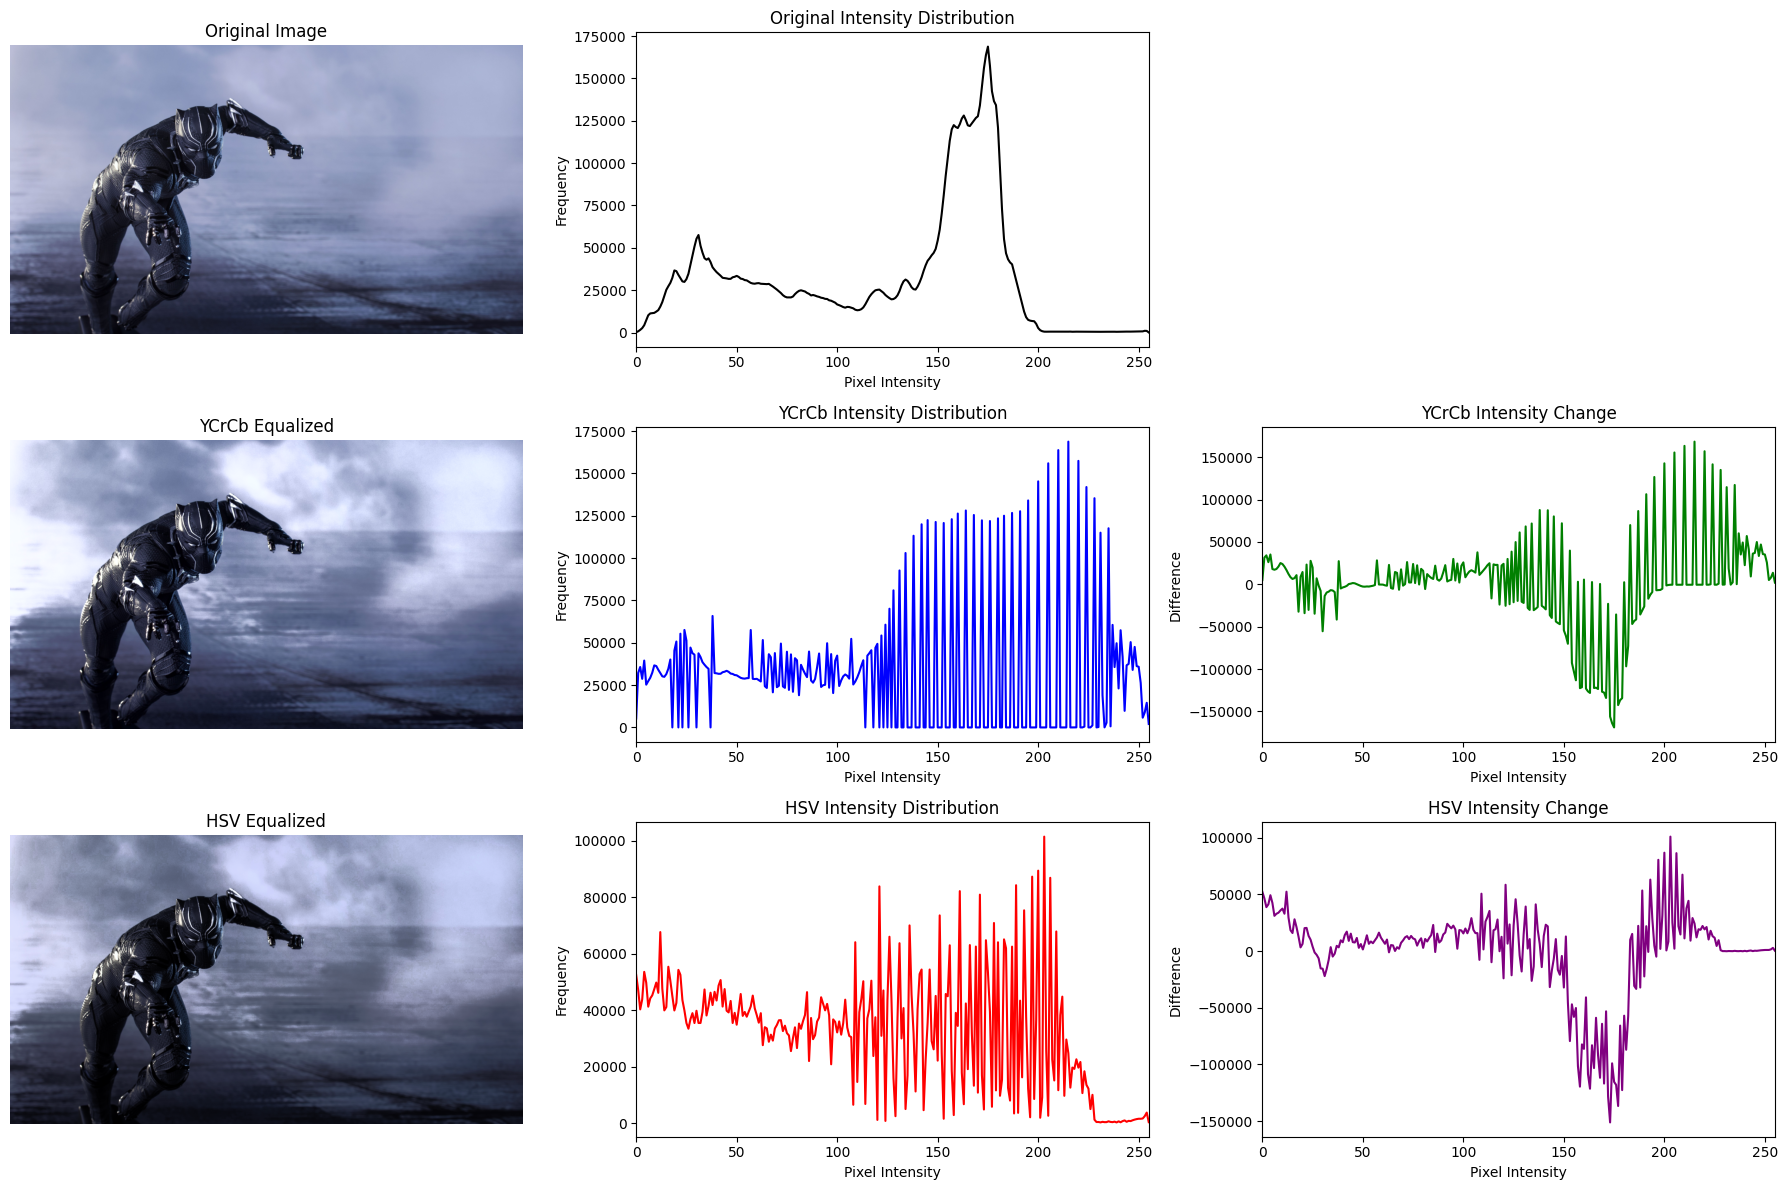


Original Intensity Statistics:
Min intensity: 52.0
Max intensity: 168798.0
Mean intensity: 32400.00
Std deviation: 37480.03

YCrCb Equalized Intensity Statistics:
Min intensity: 0.0
Max intensity: 168793.0
Mean intensity: 32400.00
Std deviation: 38377.23

HSV Equalized Intensity Statistics:
Min intensity: 308.0
Max intensity: 101490.0
Mean intensity: 32400.00
Std deviation: 20977.08


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_hist_equalization_with_intensity(image_path):
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Could not load image")
        return

    # Convert to RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # METHOD 1: YCrCb approach
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    y_eq = cv2.equalizeHist(y)
    ycrcb_eq = cv2.merge((y_eq, cr, cb))
    equalized_ycrcb = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2RGB)

    # METHOD 2: HSV approach
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v_eq = cv2.equalizeHist(v)
    hsv_eq = cv2.merge((h, s, v_eq))
    equalized_hsv = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)

    # Calculate intensity distributions
    def calculate_intensity(image):
        # Convert to grayscale for intensity analysis
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
        return hist

    original_intensity = calculate_intensity(img_rgb)
    ycrcb_intensity = calculate_intensity(equalized_ycrcb)
    hsv_intensity = calculate_intensity(equalized_hsv)

    # Create figure
    plt.figure(figsize=(18, 12))

    # Original image
    plt.subplot(3, 3, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")

    # Original intensity histogram
    plt.subplot(3, 3, 2)
    plt.plot(original_intensity, color='black')
    plt.title("Original Intensity Distribution")
    plt.xlim([0, 255])
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    # Blank space
    plt.subplot(3, 3, 3)
    plt.axis("off")

    # YCrCb equalized image
    plt.subplot(3, 3, 4)
    plt.imshow(equalized_ycrcb)
    plt.title("YCrCb Equalized")
    plt.axis("off")

    # YCrCb intensity histogram
    plt.subplot(3, 3, 5)
    plt.plot(ycrcb_intensity, color='blue')
    plt.title("YCrCb Intensity Distribution")
    plt.xlim([0, 255])
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    # YCrCb intensity difference
    plt.subplot(3, 3, 6)
    plt.plot(ycrcb_intensity - original_intensity, color='green')
    plt.title("YCrCb Intensity Change")
    plt.xlim([0, 255])
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Difference")

    # HSV equalized image
    plt.subplot(3, 3, 7)
    plt.imshow(equalized_hsv)
    plt.title("HSV Equalized")
    plt.axis("off")

    # HSV intensity histogram
    plt.subplot(3, 3, 8)
    plt.plot(hsv_intensity, color='red')
    plt.title("HSV Intensity Distribution")
    plt.xlim([0, 255])
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    # HSV intensity difference
    plt.subplot(3, 3, 9)
    plt.plot(hsv_intensity - original_intensity, color='purple')
    plt.title("HSV Intensity Change")
    plt.xlim([0, 255])
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Difference")

    plt.tight_layout()
    plt.show()

    # Calculate and print statistics
    def print_stats(hist, name):
        print(f"\n{name} Intensity Statistics:")
        print(f"Min intensity: {np.min(hist)}")
        print(f"Max intensity: {np.max(hist)}")
        print(f"Mean intensity: {np.mean(hist):.2f}")
        print(f"Std deviation: {np.std(hist):.2f}")

    print_stats(original_intensity, "Original")
    print_stats(ycrcb_intensity, "YCrCb Equalized")
    print_stats(hsv_intensity, "HSV Equalized")

image_path = "/content/black-panther-marvel-superheroes-3840x2160-1741.jpg"  # Replace with your image path
color_hist_equalization_with_intensity(image_path)